In [1]:
import pandas as pd

In [2]:
auto_df = pd.read_csv('./data/Auto.csv')

In [3]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      397 non-null object
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [4]:
auto_df.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite


In [5]:
auto_df.origin.unique()

array([1, 3, 2])

In [6]:
auto_df.year.unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

### Verifying horsepower column

In [8]:
auto_df[-auto_df.horsepower.str.isnumeric()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i


In [10]:
auto_df['horsepower'] = pd.to_numeric(auto_df['horsepower'],
                                      errors = 'coerce')

In [11]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
mpg             397 non-null float64
cylinders       397 non-null int64
displacement    397 non-null float64
horsepower      392 non-null float64
weight          397 non-null int64
acceleration    397 non-null float64
year            397 non-null int64
origin          397 non-null int64
name            397 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


In [13]:
auto_df[auto_df.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i


### Were american cars more fuel efficient than japanese cars?

In [14]:
import matplotlib.pyplot as plt
import seaborn as sn

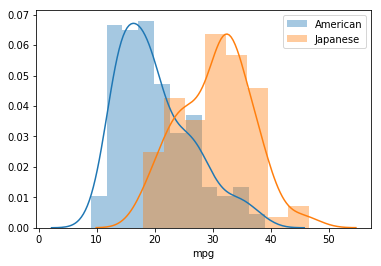

In [18]:
sn.distplot(auto_df[auto_df.origin == 1]['mpg'], label = "American")
sn.distplot(auto_df[auto_df.origin == 3]['mpg'], label = 'Japanese')
plt.legend();

In [20]:
auto_df = auto_df.dropna()

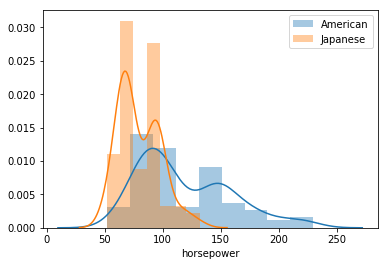

In [21]:
sn.distplot(auto_df[auto_df.origin == 1]['horsepower'], label = "American")
sn.distplot(auto_df[auto_df.origin == 3]['horsepower'], label = 'Japanese')
plt.legend();

### Understanding the relationship between mpg and horsepower

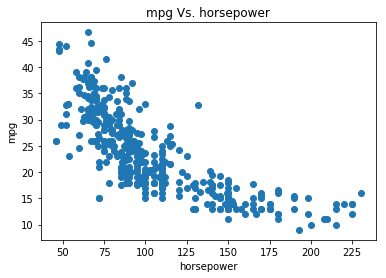

In [26]:
plt.scatter(auto_df.horsepower, auto_df.mpg);
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title("mpg Vs. horsepower");
plt.savefig('mpg_hp.png')

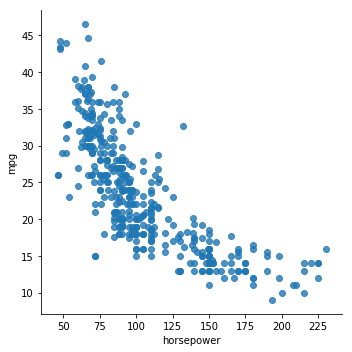

In [29]:
sn.lmplot(data = auto_df,
          x = 'horsepower',
          y = 'mpg',
          fit_reg = False);

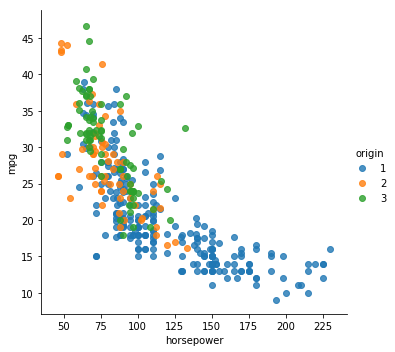

In [30]:
sn.lmplot(data = auto_df,
          x = 'horsepower',
          y = 'mpg',
          hue = 'origin',
          fit_reg = False);

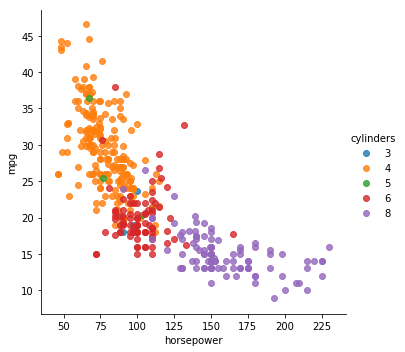

In [33]:
sn.lmplot(data = auto_df,
          x = 'horsepower',
          y = 'mpg',
          hue = 'cylinders',
          fit_reg = False);

### Cylinder Vs. Origin

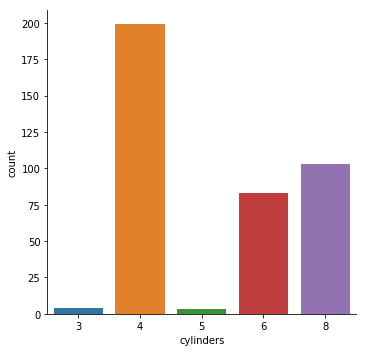

In [37]:
sn.catplot( data = auto_df,
            x = 'cylinders',
            kind = 'count');

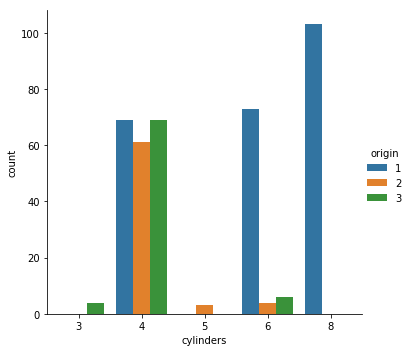

In [38]:
sn.catplot( data = auto_df,
            x = 'cylinders',
            kind = 'count',
            hue = 'origin');

### Calculating average mpg

In [39]:
auto_df[auto_df.cylinders == 4]['mpg'].mean()

29.283919597989957

In [40]:
auto_df[(auto_df.cylinders == 4) & (auto_df.origin == 3)]['mpg'].mean()

31.595652173913034

In [41]:
auto_df[auto_df.cylinders == 4]['mpg'].std()

5.670546150951293

In [42]:
from scipy import stats

In [45]:
stats.norm.interval(0.95,
                    auto_df[auto_df.cylinders == 4]['mpg'].mean(),
                    auto_df[auto_df.cylinders == 4]['mpg'].std())

(18.169853369453193, 40.39798582652672)

In [47]:
auto_df[auto_df.cylinders == 4]['mpg'].min()

18.0

In [54]:
corr_mat = auto_df[['mpg', 'horsepower', 'acceleration', 'weight']].corr()

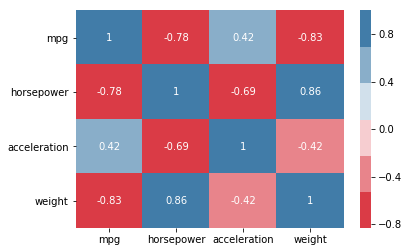

In [58]:
sn.heatmap(corr_mat, 
           annot = True,
           cmap = sn.diverging_palette(10, 240));